<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Friday October 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |[Bottom](#bot)

---

In [13]:
from scipy import stats
from random import randint
import random
from scipy.special import binom
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: Rubber Ducky Race

Every year, the Aspen Valley Rotary Club hosts a [rubber ducky race](https://www.aspenrotary.org/page/the-ducky-derby). Each Rubber Ducky is stamped with a number, tickets are sold  and if your ducky makes it to the end of the course first, you win. Exact Rules follow:

1. The Rotary Club sells "Duck Adoption" papers. Only Ducks that have been adopted start the race, so there must always be a winner.
2. The ducks are dumped into a river and race to a finish line. The adoptive parent of the first duck across the line wins. The standard prize is 15,000 dollars.
3. Before the start of the duck race, the Rotary Club randomly draws a number of special ducks. For every 3,333 ducks that start the race, 1 special duck is drawn.
4. If a special duck wins the race the prize is increased from 15,000 dollars to 1,000,000 dollars.

**Assume that all ducks are equally likely to win the ducky race.**

**Part A:**
Given that 9999 ducks start the race and you purchase 1 duck, calculate the probability by hand that your duck is selected as a special ducky.

**Part B:** Calculate the probability that the rotary club pays out the million dollar prize.

**Part C:** Calculate the probability that your duck is both picked as a special duck and wins the race.

**Part D:** Calculate the expected payout for the Rotary Club for a 9999 duck race. 

**Part E:** The Rotary Club takes out an insurance policy on having to pay the 1,000,000 dollar prize. They pay $50 per duck race to the insurance company. From your answer above, is this worth it? Explain. Is there any number of ducks that make the insurance policy a good deal? If it is not worth it, what's a reason the the Rotary Club might buy the policy anyways? 

**Part F:** Write a python function that simulates a single duck race. It should use the api below and the class written for you. DO NOT CHANGE THE API OR THE ENUMERATED CLASS. The function should take the number of ducks that start the race in as a parameter, and return a tuple of the duck's number that won, and the type of winner that duck was. 

[E.g. (1522, <Types_Of_Winner.REGULAR: 0>) ] 

The duck numbers start at 1 and go until the number passed in (Eg. For 500 ducks, the ducks are numbered 1 to 500. No Duck is numbered 0).

In [14]:
from enum import Enum
#Dont change this. You should return a tuple of (int, Type_Of_Winner) in the function below. 
#The type of winner should be from this class. The int should represent the duck number of the winning duck.
#If you want more info about Enumerated Types in python: https://docs.python.org/3/library/enum.html
class Types_Of_Winner(Enum):
    REGULAR = 0
    SPECIAL = 1

#don't change this api. We will use a set of unit tests to test this. 
#This uses a default parameter. If you are unfamiliar with default parameters: 
#https://www.geeksforgeeks.org/default-arguments-in-python/ 
#Don't change the default parameter.
def rubber_Ducky_Race(number_Of_Ducks=3333):
    #YOUR IMPLEMENTATION HERE
    #Change the below to simulate a duck race.
    winning_Duck_Number = randint(1,number_Of_Ducks)
    if winning_Duck_Number % 3333==0:
        type_Of_Winner= Types_Of_Winner.SPECIAL
    else:
        type_Of_Winner = Types_Of_Winner.REGULAR
    #you can change the variable names, but must return tuple of type (int, Types_Of_Winner)
    return (winning_Duck_Number, type_Of_Winner)

retTup=rubber_Ducky_Race()
print(retTup)

(194, <Types_Of_Winner.REGULAR: 0>)


winning_Duck_Number is a random int. If the winning ducks number is cleanly divisible by 3333, it is classified as a special duck

**Part G:** Write a python function that takes in a number of duck races (num_Duck_Races) and a number of ducks per race (num_Ducks_Per_Race). The function should run the function you wrote in part F by passing the number of ducks to the function from part F. It should run the function from part F num_Duck_Races times, and record all the results. It then should calculate the amount of money the rotary club paid out in each race and return a list of the rotary club's payouts (integer values of dollars paid out). Don't change the API as we will be auto grading this.

In [15]:
#Don't change this api. Use the parameters passed in in your implemenation of this function.
def run_Simulation_Duck_Race(num_Duck_Races, num_Ducks_Per_Race):
    #IMPLEMENTATION HERE
    payouts=[]
    for i in range(0,num_Duck_Races):
        retTup=rubber_Ducky_Race(num_Ducks_Per_Race)
        if retTup[1].value==1:
            payouts.append(1000000)
        else:
            payouts.append(15000)
    #CHANGE RETURN VALUE TO BE LIST OF PAYOUTS FROM YOUR CODE IMPLEMENTED IN THIS FUNCTION
    return payouts
pays=run_Simulation_Duck_Race(50,3333)

**Part H:** Run the simulation function you made in part G 50 times for 1111 duck races each with 3333 ducks per race. Calculate the mean of each list of payouts returned by your function from part F and plot the mean payout values on a histogram. We recommend using the default bins argument here (don't pass it in). Make sure to make your histogram legible, label the plot, and label the x and the y axes (with their units). Do this all in one cell and run the cell a few times and see what different histograms are generated from the simulations. When you find one with three distinct "bars" leave it in the output of the cell. Explain why this histogram makes sense. Your answer here should talk about what each distinct "bar" in the histogram represents, the probabiity that the rotary club pays out the million dollar prize, and the number of races in each simulation. 

Text(0,0.5,'Frequency')

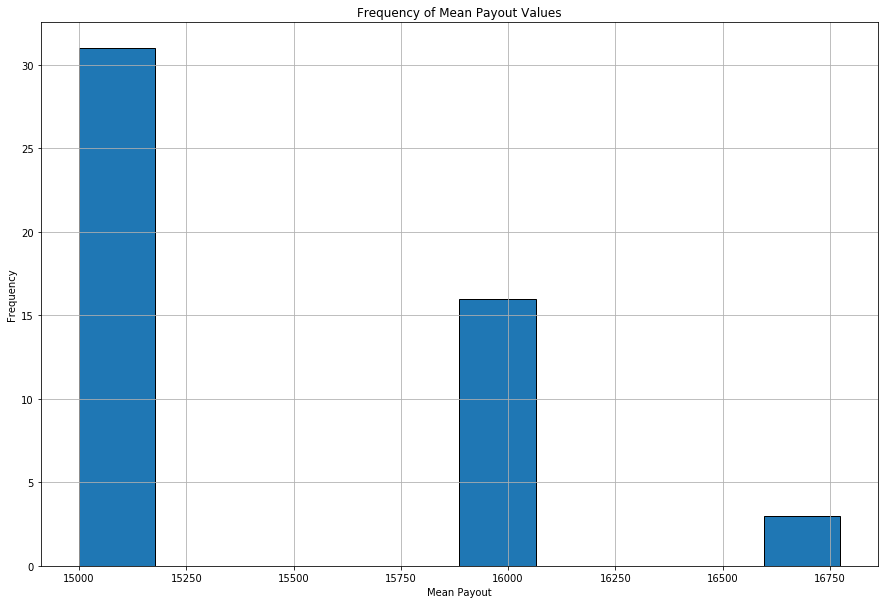

In [16]:
payouts2=[]
for i in range(0,50):
    payouts3=[]
    payouts3.append(run_Simulation_Duck_Race(1111,3333))
    payouts2.append(np.mean(payouts3))
    
meanSeries=pd.Series(payouts2)
fig, ax=plt.subplots(figsize=(15,10))
meanSeries.hist(ax=ax, edgecolor='black')
ax.set_title('Frequency of Mean Payout Values')
ax.set_xlabel('Mean Payout')
ax.set_ylabel('Frequency')

**Part I:** Pick a lucky number in between 1 and 7000 and run your function from part F 25000 times with 7,000 ducks. Capture all the results and find the number of times your duck won! Was your duck ever a winner or even a special Million Dollar Winner?

In [17]:
luckyNum=1111
numWon=0
numMillion=0
for i in range(0,25000):
    resultTup=rubber_Ducky_Race(7000)
    if resultTup[0]==1111 and resultTup[1]!=1:
        numWon+=1
    elif resultTup[0]==1111 and resultTup[1]==1:
        numMillion+=1
print("Duck number 1111 won 15000 "+str(numWon)+" times and won a million "+str(numMillion)+" times.")

Duck number 1111 won 15000 4 times and won a million 0 times.


<br>

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2: Tax Fraud

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, we will decide whether this dataset is fraudulent. 



**Part A**:  Read in the data and create a variable that holds only the character of each data point.

In [18]:
data=pd.read_table('tax.txt')
data['character']=data['taxIncomes'].astype(str).str[0].astype(int)
data.head()

,taxIncomes,character
1,5601.0,5
2,4977.0,4
3,5959.0,5
4,6267.0,6
5,5221.0,5


**Part B**: Create a histogram of the data that also plots or overlays the suggested non-fradulent density $f(x)$ as well as the density of the discrete uniform over the same support.

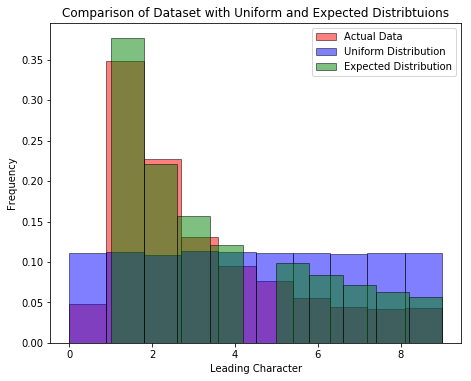

In [19]:
nonFraudDist=[]
rangeVal=[]
for i in range(1,10):
    rangeVal.append(i)
    nonFraudValue=np.log10((i+1)/i)
    nonFraudDist.append(nonFraudValue)
nonFraudDistValue=[]
uniformDist=[]
for i in range(len(data)):
    nonFraudDistValue.append(np.random.choice(np.arange(1, 10), p=nonFraudDist))
    uniformDist.append(randint(0,9))
    
data['nonFraudDistribution']=pd.Series(nonFraudDistValue).astype(int)
data['uniformDistribution']=pd.Series(uniformDist).astype(int)

fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(333)
ax.hist(data['character'], color = 'red', label='Actual Data', edgecolor='black',density=True,alpha=0.5)
ax.hist(data['uniformDistribution'].dropna(), color = 'blue', label='Uniform Distribution', edgecolor='black',density=True,alpha=0.5)
ax.hist(data['nonFraudDistribution'].dropna(), color = 'green', label='Expected Distribution', edgecolor='black',density=True,alpha=0.5)
ax.set_title('Comparison of Dataset with Uniform and Expected Distribtuions')
ax.set_xlabel('Leading Character')
ax.set_ylabel('Frequency')
ax.legend()

**Part C**: Does it appear as those the data is fraudulent, not fraudulent, or too hard to tell?  What kind of numerical measures could you use to support such a conclusion?

From the graph it appears that the actual data is quite similar to that of the expeceted distribution, which would indicate that this data is not fradulent. A more rigorous way of testing this would be to complete an analysis of the data using Bayes theorem. Using this we could find the likelihood that the data is fradulent given the probability of each character in the dataset. Essentially taking an average of the probability of fradulence for p(X=1)=0.35, etc, and if the probability of fraudlence is high this would be a more rigrourous way of saying the data is fraudulent.

**Part D**: Create a new object that stores only the first digit of the first 100 distinct powers of 2, e.g. $Y=[2, 2^2, 2^3, 2^4, \dots ]$.  Repeat steps a) and b) for this new data set, plotting the distribution of the first digit of terms in $Y$ against $f(x)$.

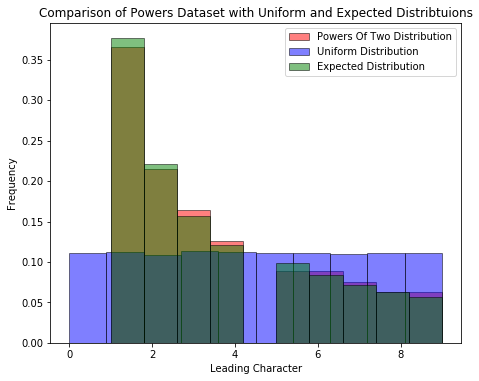

In [20]:
twoPow=[]
for i in range(0,100):
    twoPow.append(2**i)
    
data['twos']=pd.Series(twoPow).astype(str).str[0].astype(int)

fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(333)
ax.hist(data['twos'].dropna(), color = 'red', label='Powers Of Two Distribution', edgecolor='black',density=True,alpha=0.5)
ax.hist(data['uniformDistribution'].dropna(), color = 'blue', label='Uniform Distribution', edgecolor='black',density=True,alpha=0.5)
ax.hist(data['nonFraudDistribution'].dropna(), color = 'green', label='Expected Distribution', edgecolor='black',density=True,alpha=0.5)
ax.set_title('Comparison of Powers Dataset with Uniform and Expected Distribtuions')
ax.set_xlabel('Leading Character')
ax.set_ylabel('Frequency')
ax.legend()

From the graph it appears that a distribtution formed from powers of two is also similar to that of a non-fraudlent distribtution. Again, a more rigorous way of testing this would be to complete a Bayseian analysis of the data as compared to the expected distribution.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Poker

It's time to play poker.  (https://en.wikipedia.org/wiki/Texas_hold_%27em#Hand_values) Assume that we are using a standard deck of cards without jokers (52 cards). For each round, you will be dealt 5 cards from the deck without replacement. There are several different types of hands that can be dealt; listed below are a few of interest: 

- Highcard (Simple value of the card. Lowest: 2 - Highest: Ace)
- Pair (Two cards with the same value)
- Two pair (Twice two cards with the same value)
- Three of a kind (Three cards with the same value)
- Straight (Sequence of 5 cards in increasing value, Ace can only follow K)
- Four of a kind (Four cards with the same value)
- Full house (Three of a kind and a pair)
- Flush (5 cards of the same suit)

**Part A**: What is the exact probability you get at least a Pair in your 5 cards? What is the probability of getting a Full House?  (Note that we're including pairs as a subset of a full house, here)

**Part B**: Write a function `getCards()` to randomly generate 5 cards from the no-joker deck. This function should return an array of 5 cards.

In [21]:
cards=['A','2','3','4','5','6','7','8','9','10','J','Q','K'
       'A','2','3','4','5','6','7','8','9','10','J','Q','K'
       'A','2','3','4','5','6','7','8','9','10','J','Q','K'
       'A','2','3','4','5','6','7','8','9','10','J','Q','K']
       
def getCards(cards):
    return random.sample(cards,5)

**Part C**: Run the `getCards()` simulation 10000 times, and store the result in an array named `card_array`.

In [22]:
card_array=[]
for i in range(10000):
    card_array.append(getCards(cards))

**Part D**: Write a function `pair(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of have Pair? Does the result agree with your calculation in Part A?

In [23]:
def pair(card_array, num_sim):
    pairCount=0
    for list in card_array:
        card=set(list)
        #sets get rid of same elements
        if len(card)!=5:
            pairCount+=1
    return (pairCount/num_sim)

pairResults=pair(card_array,10000)

print("Probability of pair or better: "+str(pairResults))
print("This result is in rough agreement with the calculation from part A")

Probability of pair or better: 0.49
This result is in rough agreement with the calculation from part A


**Part E:** Write a function `fullhouse(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of having a Full House? Does the result agree with your calculation in Part A?

In [24]:
from collections import Counter
def fullhouse(card_array,num_sim):
    fullCount=0
    for list in card_array:
        card=set(list)
        numReps=dict(Counter(list))
        if len(card)==2 and 4 not in numReps:
            fullCount+=1
    return (fullCount/num_sim)

fullhouseResults=fullhouse(card_array,10000)
print("Probability of full house: "+str(fullhouseResults))
print("This result is in agreement with the calculation from part A")

Probability of full house: 0.0021
This result is in agreement with the calculation from part A
